In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [4]:
# read the churn data
churn = pd.read_csv("telecom_churn_data.csv")

In [5]:
#first look at the data
churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [6]:
#data information
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [7]:
#Data overview

In [8]:
print ("Rows     : " ,churn.shape[0])
print ("Columns  : " ,churn.shape[1])
print ("\nFeatures : \n" ,churn.columns.tolist())
print ("\nMissing values :  ", churn.isnull().sum().values.sum())
print ("\nUnique values :  \n",churn.nunique())

Rows     :  99999
Columns  :  226

Features : 
 ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og

In [13]:
#Checking the percentage of missing values column wise

In [9]:
print ("\nMissing values :  ", round(churn.isnull().sum()/len(churn.index), 2)*100)



Missing values :   mobile_number                0.0
circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
last_date_of_month_9         2.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6       

In [10]:
#churn data set contains 99999 rows and 226 columns.


In [11]:
# Summary statistics of the chrun data 
churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [14]:
#Finding columns which have more than 70% data missing

In [7]:
col_missing_df=round(churn.isnull().sum()/len(churn.index), 2)*100

In [8]:
col_missing_df[col_missing_df>=70]

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

In [17]:
#Almost 40 columns have more than 70% data missing
#these columns can be used to filter high value customers hence cannot be dropped

In [9]:
#creating a back up of the data
churn_df=churn.copy()

In [21]:
#there are 8 categorical variables and has more than 70% data missing

In [10]:
cat_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
"night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

for var in cat_vars:
    churn[var].fillna(value=-1, inplace=True)

In [11]:
#Create dummy for the categorical variables

In [12]:
night_pck_user_6_s = pd.get_dummies(churn['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(churn['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(churn['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_s = pd.get_dummies(churn['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(churn['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(churn['fb_user_8'],prefix="fb8",drop_first=True)

churn = pd.concat([churn,night_pck_user_6_s],axis=1)
churn = pd.concat([churn,night_pck_user_7_s],axis=1)
churn = pd.concat([churn,night_pck_user_8_s],axis=1)

churn = pd.concat([churn,fb_user_6_s],axis=1)
churn = pd.concat([churn,fb_user_7_s],axis=1)
churn = pd.concat([churn,fb_user_8_s],axis=1)

# drop all categorial columns
churn = churn.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)

In [13]:
#Missing value treatment

In [15]:
# Percentage of missing values
round(100*(churn.isnull().sum()/len(churn.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

(array([2.056e+04, 2.143e+03, 1.357e+03, 4.800e+02, 2.970e+02, 1.540e+02,
        5.800e+01, 4.900e+01, 1.900e+01, 1.000e+01, 8.000e+00, 5.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ,
        27.4, 29.8, 32.2, 34.6, 37. , 39.4, 41.8, 44.2, 46.6, 49. , 51.4,
        53.8, 56.2, 58.6, 61. ]),
 <a list of 25 Patch objects>)

<Figure size 432x288 with 0 Axes>

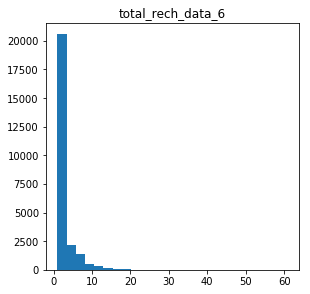

In [17]:
#Distribution to impute on kissing value for the variables which are good predictor
# total_rech_data_6
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(churn.total_rech_data_6.dropna(),bins=25)



(array([2.0093e+04, 2.4730e+03, 1.2760e+03, 7.1000e+02, 4.7600e+02,
        2.3600e+02, 1.1300e+02, 6.4000e+01, 5.3000e+01, 1.9000e+01,
        1.9000e+01, 1.1000e+01, 2.0000e+00, 5.0000e+00, 5.0000e+00,
        1.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.  ,  3.12,  5.24,  7.36,  9.48, 11.6 , 13.72, 15.84, 17.96,
        20.08, 22.2 , 24.32, 26.44, 28.56, 30.68, 32.8 , 34.92, 37.04,
        39.16, 41.28, 43.4 , 45.52, 47.64, 49.76, 51.88, 54.  ]),
 <a list of 25 Patch objects>)

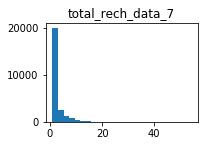

In [18]:
# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(churn.total_rech_data_7.dropna(),bins=25)

(array([2.1072e+04, 3.2970e+03, 5.3100e+02, 1.3400e+02, 6.1000e+01,
        3.6000e+01, 1.0000e+01, 1.0000e+00, 0.0000e+00, 4.0000e+00,
        4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 3.0280e+02, 6.0460e+02, 9.0640e+02, 1.2082e+03,
        1.5100e+03, 1.8118e+03, 2.1136e+03, 2.4154e+03, 2.7172e+03,
        3.0190e+03, 3.3208e+03, 3.6226e+03, 3.9244e+03, 4.2262e+03,
        4.5280e+03, 4.8298e+03, 5.1316e+03, 5.4334e+03, 5.7352e+03,
        6.0370e+03, 6.3388e+03, 6.6406e+03, 6.9424e+03, 7.2442e+03,
        7.5460e+03]),
 <a list of 25 Patch objects>)

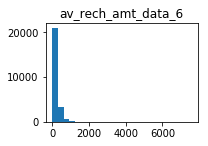

In [19]:
# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(churn.av_rech_amt_data_6.dropna(),bins=25)

(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <a list of 25 Patch objects>)

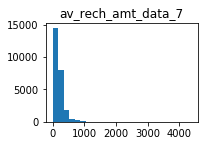

In [20]:
# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(churn.av_rech_amt_data_7.dropna(),bins=25)

In [21]:
#imputing missing value with 1

In [22]:
churn.total_rech_data_6.fillna(value=0, inplace=True)
churn.total_rech_data_7.fillna(value=0, inplace=True)
churn.total_rech_data_8.fillna(value=0, inplace=True)
churn.total_rech_data_9.fillna(value=0, inplace=True)

churn.av_rech_amt_data_6.fillna(value=0, inplace=True)
churn.av_rech_amt_data_7.fillna(value=0, inplace=True)
churn.av_rech_amt_data_8.fillna(value=0, inplace=True)
churn.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [23]:
# Percentage of missing values
round(100*(churn.isnull().sum()/len(churn.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [24]:
#dropping the missing data 

In [26]:
# Columns with more than 70% missing values
cols_miss_data = round(100*(churn.isnull().sum()/len(churn.index)), 2)
print(cols_miss_data[cols_miss_data >= 70])

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
dtype: float64


In [31]:
# we can observe that the recharge date and the recharge value are missing together that implies the customer didn't recharge

In [27]:
#Hence dropping them
drp_miss_val_cols = cols_miss_data[cols_miss_data > 70].index

In [28]:
churn.drop(drp_miss_val_cols, axis=1, inplace=True)


In [29]:
print('Dataframe Shape: ', churn.shape)

Dataframe Shape:  (99999, 208)


In [30]:
#2. Filter high-value customers

In [34]:
#cal the total recharge amount to find out the high value cust
churn['tot_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['tot_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7
churn['tot_data_rech_8'] = churn.total_rech_data_8 * churn.av_rech_amt_data_8
churn['tot_data_rech_9'] = churn.total_rech_data_9 * churn.av_rech_amt_data_9

In [36]:
# dropping the above columns since we already dervied vars out of it
drop_data_cols = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
churn.drop(drop_data_cols, axis=1, inplace=True)

In [40]:
churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,tot_data_rech_6,tot_data_rech_7,tot_data_rech_8,tot_data_rech_9
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.0000

In [41]:
#to find out the total recharge amount= total recharge amount spent on data+total recharge amount spent on call

In [42]:
churn['tot_amt_data_6'] = churn.total_rech_amt_6 + churn.tot_data_rech_6
churn['tot_amt_data_7'] = churn.total_rech_amt_7 + churn.tot_data_rech_7
churn['tot_amt_data_8'] = churn.total_rech_amt_8 + churn.tot_data_rech_8
churn['tot_amt_data_9'] = churn.total_rech_amt_9 + churn.tot_data_rech_9


In [43]:
#2. Filter high-value customers

#As mentioned above, you need to predict churn only for the high-value customers. 
#Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
#After filtering the high-value customers, you should get about 29.9k rows.

In [44]:
# average recharge done by customer in June and July
churn['av_rech_amt_data_6_7'] = (churn.tot_amt_data_6 + churn.tot_amt_data_7)/2

In [45]:
percentile_amount_70 = churn.av_rech_amt_data_6_7.quantile(0.7)

In [47]:
percentile_amount_70

478.0

In [48]:
#The recharge amount at 70th percentile is 478

In [49]:
print('the recharge amount at 70th percentile: ', percentile_amount_70)

the recharge amount at 70th percentile:  478.0


In [51]:
# retaining only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn = churn.loc[churn.av_rech_amt_data_6_7 >= churn.av_rech_amt_data_6_7.quantile(0.7), :]
churn = churn.reset_index(drop=True)
churn.shape

(30001, 209)

In [52]:
round(100*(churn.isnull().sum()/len(churn.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          0.75
std_og_t2o_mou          0.75
loc_ic_t2o_mou          0.75
last_date_of_month_6    0.00
last_date_of_month_7    0.09
last_date_of_month_8    0.55
last_date_of_month_9    1.22
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             1.82
onnet_mou_7             1.79
onnet_mou_8             3.91
onnet_mou_9             6.34
offnet_mou_6            1.82
offnet_mou_7            1.79
offnet_mou_8            3.91
offnet_mou_9            6.34
roam_ic_mou_6           1.82
roam_ic_mou_7           1.79
roam_ic_mou_8           3.91
roam_ic_mou_9           6.34
roam_og_mou_6           1.82
roam_og_mou_7           1.79
roam_og_mou_8           3.91
roam_og_mou_9           6.34
loc_og_t2t_mou_6        1.82
loc_og_t2t_mou_7        1.79
loc_og_t2t_mou_8        3.91
loc_og_t2t_mou_9        6.34
loc_og_t2m_mou_6        1.82
loc_og_t2m_mou

In [56]:
# delete variables created to filter high-value customers
churn_filter = churn.drop(['tot_data_rech_6', 'tot_data_rech_7',
                                      'tot_amt_data_6', 'tot_amt_data_7', 'av_rech_amt_data_6_7'], axis=1)
churn_filter.shape

(30001, 204)

In [58]:
#3. Tag churners and remove attributes of the churn phase
#Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
#Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 


In [59]:
# Tagging Churn
X = churn_filter["total_ic_mou_9"] + churn_filter["total_og_mou_9"] + churn_filter["vol_2g_mb_9"] + churn_filter["vol_3g_mb_9"]

In [61]:
X.head()

0       0.00
1       0.00
2     177.09
3    1284.14
4     583.78
dtype: float64

In [60]:
churn_filter["churn"] = np.where(X, 0, 1)

In [63]:
churn_filter["churn"].head(20)

0     1
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
15    0
16    0
17    1
18    0
19    0
Name: churn, dtype: int32

In [64]:
#remove the previous columns which was used to create the vars

In [65]:
churn_filter = churn_filter.drop(['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'], axis=1)

In [67]:
round(100*(churn_filter.isnull().sum()/len(churn_filter.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          0.75
std_og_t2o_mou          0.75
loc_ic_t2o_mou          0.75
last_date_of_month_6    0.00
last_date_of_month_7    0.09
last_date_of_month_8    0.55
last_date_of_month_9    1.22
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             1.82
onnet_mou_7             1.79
onnet_mou_8             3.91
onnet_mou_9             6.34
offnet_mou_6            1.82
offnet_mou_7            1.79
offnet_mou_8            3.91
offnet_mou_9            6.34
roam_ic_mou_6           1.82
roam_ic_mou_7           1.79
roam_ic_mou_8           3.91
roam_ic_mou_9           6.34
roam_og_mou_6           1.82
roam_og_mou_7           1.79
roam_og_mou_8           3.91
roam_og_mou_9           6.34
loc_og_t2t_mou_6        1.82
loc_og_t2t_mou_7        1.79
loc_og_t2t_mou_8        3.91
loc_og_t2t_mou_9        6.34
loc_og_t2m_mou_6        1.82
loc_og_t2m_mou

In [69]:
print('Dataframe Shape: ', churn_filter.shape)

Dataframe Shape:  (30001, 201)


In [70]:
# change the churn data type to category
churn_filter.churn = churn_filter.churn.astype("category")

In [71]:
# print churn ratio
print(churn_filter.churn.value_counts()*100/churn_filter.shape[0])

0    91.863605
1     8.136395
Name: churn, dtype: float64


In [73]:
# 0 is not churn, 1 is churn


In [74]:
churn_filter_unique_count = churn_filter.nunique().sort_values(ascending=False)

In [75]:
print("Dataframe Unique Values:", churn_filter_unique_count)

Dataframe Unique Values: mobile_number           30001
arpu_7                  29084
arpu_6                  29072
arpu_8                  28073
arpu_9                  27022
total_og_mou_7          23684
total_og_mou_6          23519
total_og_mou_8          22316
offnet_mou_7            21263
offnet_mou_6            21220
offnet_mou_8            20163
total_ic_mou_7          20161
total_ic_mou_6          20121
total_ic_mou_8          19581
offnet_mou_9            19150
loc_ic_mou_6            18524
loc_og_mou_7            18502
loc_ic_mou_7            18496
loc_og_mou_6            18348
loc_ic_mou_8            18069
loc_og_mou_8            17582
loc_ic_mou_9            17557
loc_og_mou_9            17116
onnet_mou_7             16987
onnet_mou_6             16890
std_og_mou_7            15958
std_og_mou_6            15922
onnet_mou_8             15872
loc_og_t2m_mou_7        15674
loc_og_t2m_mou_6        15625
loc_ic_t2m_mou_7        15547
loc_ic_t2m_mou_6        15461
loc_og_t2m_mou_

In [76]:
churn_filter_unique_count_is_zero = churn_filter_unique_count[churn_filter_unique_count == 0]

In [77]:
drop_columns = list(churn_filter_unique_count_is_zero.index)

In [78]:
#dropping cols which have same entries
churn_filter_unique_count_is_one = churn_filter_unique_count[churn_filter_unique_count == 1]


In [80]:

drop_columns += list(churn_filter_unique_count_is_one.index)


In [81]:
churn_filter.drop(drop_columns, axis=1, inplace=True)


In [82]:
print('Dataframe Shape: ', churn_filter.shape)

Dataframe Shape:  (30001, 185)


In [84]:
#After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
churn_filter = churn_filter.filter(regex='[^9]$', axis=1)
churn_filter.shape

(30001, 144)

In [85]:
# dropping rows with missing values greater >= 25
churn_filter = churn_filter[churn_filter.isnull().sum(axis=1) < 25]
print('Df after dropping rows: ', churn_filter.shape)

Df after dropping rows:  (28504, 144)


In [89]:
churn_filter.columns.tolist()


['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [90]:
#'date_of_last_rech_6',
 #'date_of_last_rech_7',
 #'date_of_last_rech_8',
#are the date vars

In [91]:
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]


In [92]:
churn_filter[date_vars].head()


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
1,6/27/2014,7/25/2014,8/26/2014
2,6/25/2014,7/31/2014,8/30/2014
3,6/30/2014,7/31/2014,8/31/2014
4,6/18/2014,7/7/2014,8/24/2014
5,6/30/2014,7/30/2014,8/26/2014


In [93]:
# converting to datetime
for col in date_vars:
    churn_filter[col] = pd.to_datetime(churn_filter[col])

In [94]:
# Creating new days columns(last day of month)
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

In [96]:
#subtracting with the last day of month to get number of days left for the recharge

churn_filter["rech_days_left_6"]      = (last_date_of_month_6 - churn_filter.date_of_last_rech_6).astype('timedelta64[D]')
churn_filter["rech_days_left_7"]      = (last_date_of_month_7 - churn_filter.date_of_last_rech_7).astype('timedelta64[D]')
churn_filter["rech_days_left_8"]      = (last_date_of_month_8 - churn_filter.date_of_last_rech_8).astype('timedelta64[D]')

In [97]:
day_cols = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]


In [99]:
print(churn_filter[day_cols].head(10))


    rech_days_left_6  rech_days_left_7  rech_days_left_8
1                3.0               6.0               5.0
2                5.0               0.0               1.0
3                0.0               0.0               0.0
4               12.0              24.0               7.0
5                0.0               1.0               5.0
6                0.0               3.0               7.0
7                6.0               9.0               0.0
8                1.0               8.0               3.0
9                1.0               0.0               5.0
10               2.0               1.0               0.0


In [100]:
#drop all the duplicate cols
churn_filter.drop(date_vars, axis=1, inplace=True)


In [102]:
#Since the date cols are not importsnt we will drop them
churn_filter.drop('rech_days_left_7', axis=1, inplace=True)


In [103]:
churn_filter.drop('rech_days_left_6', axis=1, inplace=True)


In [104]:
churn_filter.drop('rech_days_left_8', axis=1, inplace=True)


In [105]:
#save the clean file
churn_filter.to_csv("churn_filter_clean.csv", sep=',', index=False)

In [4]:
churn_filter_clean = pd.read_csv('churn_filter_clean.csv', low_memory=False)


In [106]:
#Univariate EDA

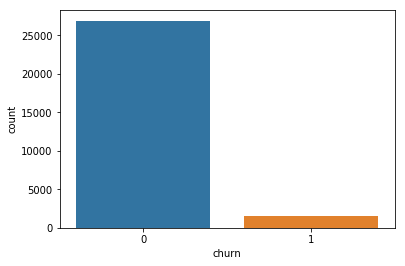

In [6]:
sns.countplot("churn",data=churn_filter_clean)

In [8]:
#dropping the mobile number 

churn_filter_clean.drop('mobile_number', axis=1, inplace=True)


In [9]:
churn_filter_clean.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,tot_data_rech_8,tot_amt_data_8,churn
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0,0,0,0,0.0,3638.0,1
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,0,0,1,0,1,207.0,327.0,0
2,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,0,0,0,0,0,0.0,718.0,0
3,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0,0,0,0,1,0,1,540.0,979.0,0
4,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,1,0,1,0,1,455.0,910.0,0


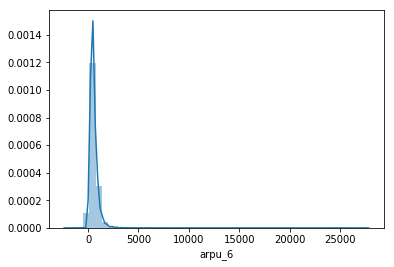

In [10]:
sns.distplot(churn_filter_clean['arpu_6'])
plt.show()

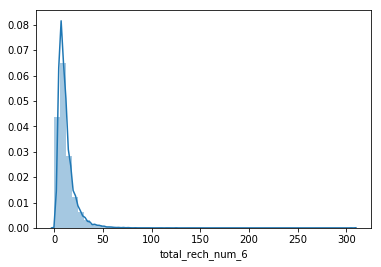

In [11]:
sns.distplot(churn_filter_clean['total_rech_num_6'])
plt.show()

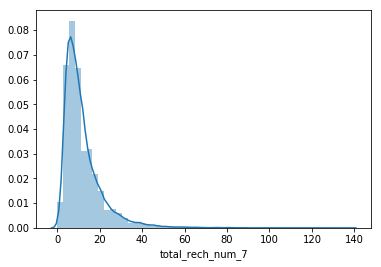

In [12]:
sns.distplot(churn_filter_clean['total_rech_num_7'])
plt.show()

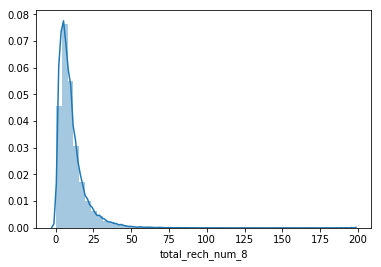

In [13]:
sns.distplot(churn_filter_clean['total_rech_num_8'])
plt.show()

In [14]:
# outliers
churn_filter_clean.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,tot_data_rech_8,tot_amt_data_8,churn
count,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,...,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,16.267511,...,0.011718,0.042310,0.512349,0.046029,0.523505,0.057395,0.484353,469.506616,1074.285769,0.055992
std,448.960314,480.075654,500.754116,458.723036,482.671988,464.022072,479.249454,502.604354,485.648594,75.510149,...,0.107614,0.201299,0.499856,0.209551,0.499456,0.232601,0.499764,1644.912839,1821.472533,0.229911
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,317.360500,322.602500,254.759000,20.140000,19.530000,14.840000,80.732500,80.352500,60.490000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,424.750000,0.000000
50%,485.169000,488.899500,442.791000,89.985000,89.910000,74.085000,231.550000,231.825000,199.875000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,25.000000,709.000000,0.000000
75%,698.914000,704.999500,672.453250,298.760000,304.895000,257.415000,494.372500,506.467500,457.432500,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,342.000000,1170.000000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2613.310000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89106.500000,95884.500000,1.000000


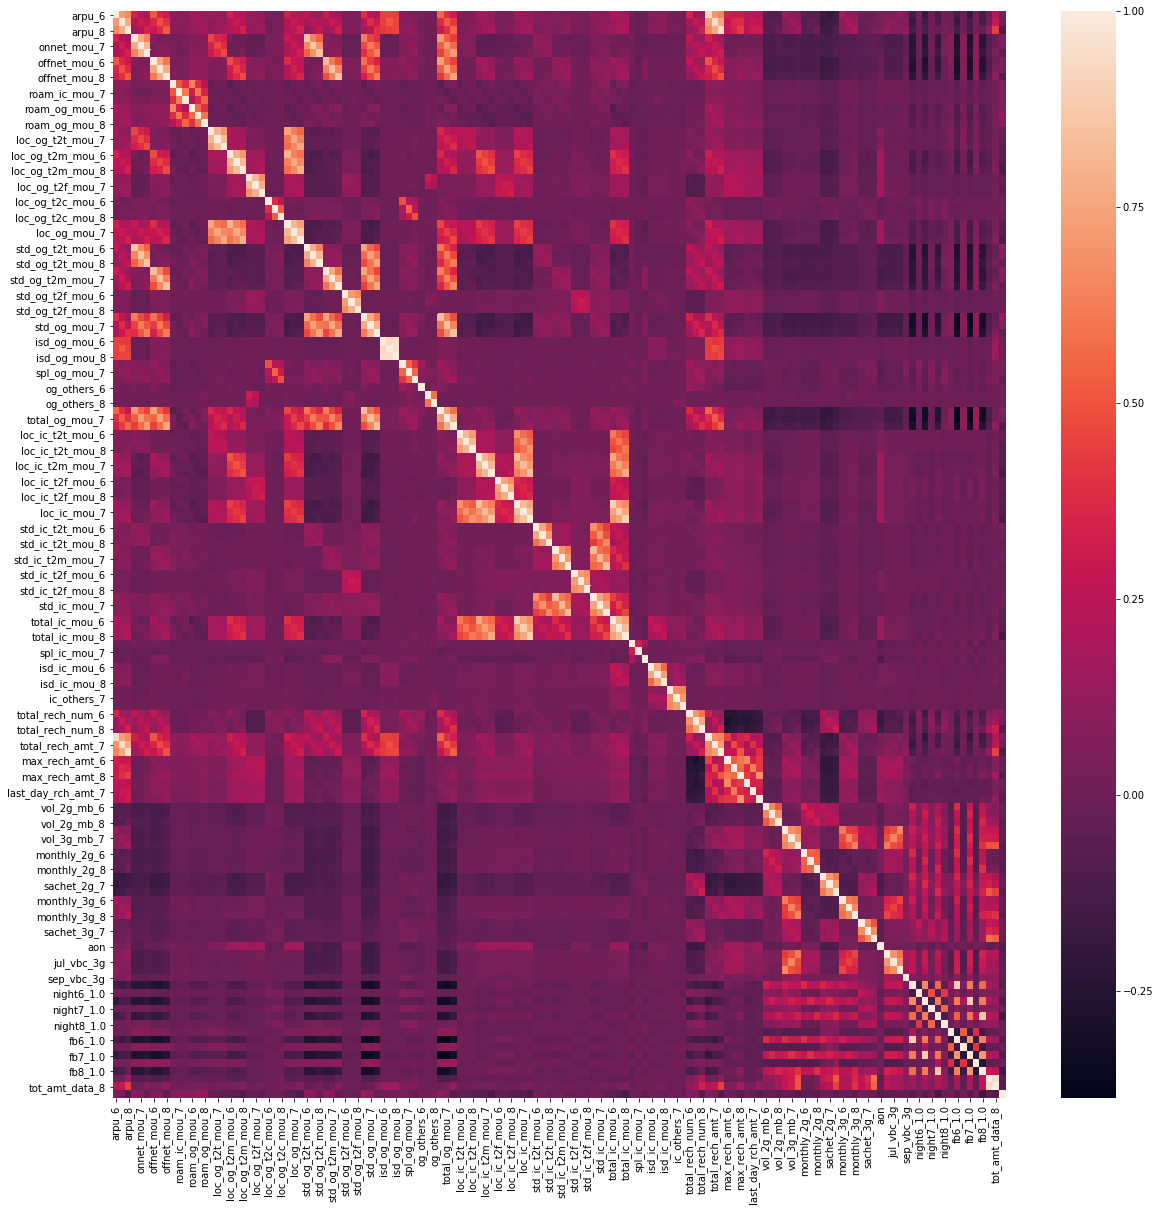

In [15]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(churn_filter_clean.corr())

In [16]:
# correlation matrix
corr_matrix = churn_filter_clean.corr().abs()

# Selecting the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# feature columns with correlation greater than 0.80
high_corr_feat = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_feat), high_corr_feat))

HIGHLY CORRELATED FEATURES IN DATA SET:37

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'fb6_1.0', 'fb7_1.0', 'fb8_1.0', 'tot_amt_data_8']


In [17]:
#there are 37 highly correlated features found

In [19]:
#Model Biulding

In [8]:
X = churn_filter_clean.drop(['churn'],axis=1)
y = churn_filter_clean['churn']

NameError: name 'churn_filter_clean' is not defined

In [22]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,tot_data_rech_8,tot_amt_data_8
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0,0,0,0,0,0.0,3638.0
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,1,0,0,0,0,1,0,1,207.0,327.0
2,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,0,0,0,0,0,0,0.0,718.0
3,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,0,0,0,0,1,0,1,540.0,979.0
4,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,1,0,1,0,1,455.0,910.0


In [24]:
churn_filter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Columns: 140 entries, arpu_6 to churn
dtypes: float64(102), int64(38)
memory usage: 30.4 MB


In [14]:
from sklearn.model_selection import train_test_split


In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [27]:
#Applying standard scaling

In [28]:
scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

In [36]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [35]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,tot_data_rech_8,tot_amt_data_8
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0,0,0,0,0,0.0,3638.0
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,1,0,0,0,0,1,0,1,207.0,327.0
2,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,0,0,0,0,0,0,0.0,718.0
3,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,0,0,0,0,1,0,1,540.0,979.0
4,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,1,0,1,0,1,455.0,910.0


In [30]:
#running first model

In [31]:
import statsmodels.api as sm

In [37]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19952
Model:                            GLM   Df Residuals:                    19816
Model Family:                Binomial   Df Model:                          135
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3041.5
Date:                Tue, 21 Jan 2020   Deviance:                       6082.9
Time:                        14:00:09   Pearson chi2:                 1.33e+08
No. Iterations:                    10   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3501      0.139     -9.693      0.000      -1.623      -1.077
arpu_6              2.461e-05      0.000      0.090      0.928      -0.001       0.001
arpu_7                 0.0010      0.000      2.985      0.003       0.000       0.002
arpu_8                 0.0009      0.000      2.172      0.030    8.53e-05       0.002
onnet_mou_6            0.0025      0.009      0.271      0.786      -0.016       0.021
onnet_mou_7            0.0061      0.005      1.255      0.210      -0.003       0.016
onnet_mou_8           -0.0066      0.007     -0.905      0.365      -0.021       0.008
offnet_mou_6           0.0032      0.009      0.345      0.730      -0.015       0.021
offnet_mou_7           0.0053      0.005      1.107      0.268      -0.004       0.015
offnet_mou_8          -0.0064      0.007     -0.879      0.380      -0.021       0.008
roam_ic_mou_6          0.0008      0.000      1.661      0.097      -0.000       0.002
roam_ic_mou_7          0.0002      0.001      0.435      0.663      -0.001       0.001
roam_ic_mou_8       4.121e-05      0.000      0.099      0.921      -0.001       0.001
roam_og_mou_6         -0.0026      0.009     -0.276      0.783      -0.021       0.016
roam_og_mou_7         -0.0047      0.005     -0.973      0.331      -0.014       0.005
roam_og_mou_8          0.0069      0.007      0.951      0.342      -0.007       0.021
loc_og_t2t_mou_6       1.0586      6.409      0.165      0.869     -11.503      13.620
loc_og_t2t_mou_7       5.3978      6.473      0.834      0.404      -7.289      18.085
loc_og_t2t_mou_8      17.4518      7.029      2.483      0.013       3.674      31.229
loc_og_t2m_mou_6       1.0569      6.409      0.165      0.869     -11.505      13.619
loc_og_t2m_mou_7       5.3986      6.473      0.834      0.404      -7.288      18.086
loc_og_t2m_mou_8      17.4519      7.029      2.483      0.013       3.674      31.229
loc_og_t2f_mou_6       1.0641      6.409      0.166      0.868     -11.498      13.626
loc_og_t2f_mou_7       5.3846      6.473      0.832      0.406      -7.303      18.072
loc_og_t2f_mou_8      17.4578      7.030      2.483      0.013       3.680      31.236
loc_og_t2c_mou_6      -0.0192      0.008     -2.466      0.014      -0.035      -0.004
loc_og_t2c_mou_7      -0.0009      0.006     -0.157      0.875      -0.012       0.010
loc_og_t2c_mou_8       0.0066      0.007      0.910      0.363      -0.008       0.021
loc_og_mou_6         -16.1001      7.895     -2.039      0.041     -31.573      -0.627
loc_og_mou_7          -9.1102      8.407     -1.084      0.279     -25.588       7.367
loc_og_mou_8          -5.9385      9.260     -0.641      0.521     -24.087      12.210
std_og_t2t_mou_6       1.3485      7.736      0.174      0.862     -13.814      16.511
std_og_t2t_mou_7      -5.7840      7.820     -0.740      0.460     -21.112       9.544
std_og_t2t_mou_8      11.4933 

In [38]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'night8_0.0', 'night8_1.0', 'fb6_0.0', 'fb6_1.0', 'fb7_0.0', 'fb7_1.0',
       'fb8_0.0', 'fb8_1.0', 'tot_data_rech_8', 'tot_amt_data_8'],
      dtype='object', length=139)

In [40]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,tot_data_rech_8,tot_amt_data_8
0,1.133316,1.623150,5.282967,-0.452154,-0.458401,-0.414725,0.153460,0.352781,-0.050070,-0.000497,...,-1.061979,-0.108888,-0.210188,-1.025011,-0.219658,-1.048170,-0.24676,-0.969181,-0.285434,1.407520
1,-0.404618,-0.163322,-0.776237,0.323600,0.155587,-0.451814,-0.595161,-0.615254,-0.440133,-0.215439,...,0.941638,-0.108888,-0.210188,-1.025011,-0.219658,0.954044,-0.24676,1.031799,-0.159590,-0.410272
2,-0.102287,0.056501,0.223070,-0.354992,-0.297979,-0.343929,0.788840,1.008418,1.303772,-0.215439,...,-1.061979,-0.108888,-0.210188,-1.025011,-0.219658,-1.048170,-0.24676,-0.969181,-0.285434,-0.195607
3,-1.082576,-0.784748,-0.317712,-0.471513,-0.466730,-0.455047,-0.614463,-0.597884,-0.297208,-0.215439,...,0.941638,-0.108888,-0.210188,-1.025011,-0.219658,0.954044,-0.24676,1.031799,0.042856,-0.052313
4,0.928038,3.733236,-0.233310,-0.578246,-0.571689,-0.527415,-0.792682,-0.775681,-0.721164,-0.215439,...,0.941638,-0.108888,-0.210188,0.975599,-0.219658,0.954044,-0.24676,1.031799,-0.008819,-0.090196


In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [42]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19952
Model:                            GLM   Df Residuals:                    19816
Model Family:                Binomial   Df Model:                          135
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 21 Jan 2020   Deviance:                          nan
Time:                        14:08:21   Pearson chi2:                 6.09e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.817e+14   4.76e+05  -1.64e+09      0.000   -7.82e+14   -7.82e+14
arpu_6             -3.931e+13   1.84e+06  -2.14e+07      0.000   -3.93e+13   -3.93e+13
arpu_7              1.622e+13      2e+06    8.1e+06      0.000    1.62e+13    1.62e+13
arpu_8              2.347e+14   2.11e+06   1.11e+08      0.000    2.35e+14    2.35e+14
onnet_mou_6         1.587e+15   4.38e+07   3.63e+07      0.000    1.59e+15    1.59e+15
onnet_mou_7        -2.467e+14   3.15e+07  -7.83e+06      0.000   -2.47e+14   -2.47e+14
onnet_mou_8        -1.119e+15   3.72e+07  -3.01e+07      0.000   -1.12e+15   -1.12e+15
offnet_mou_6        2.112e+15    4.5e+07   4.69e+07      0.000    2.11e+15    2.11e+15
offnet_mou_7       -5.193e+14   3.08e+07  -1.68e+07      0.000   -5.19e+14   -5.19e+14
offnet_mou_8       -3.869e+13   3.79e+07  -1.02e+06      0.000   -3.87e+13   -3.87e+13
roam_ic_mou_6       -4.42e+12   7.14e+05  -6.19e+06      0.000   -4.42e+12   -4.42e+12
roam_ic_mou_7      -8.157e+13   7.96e+05  -1.03e+08      0.000   -8.16e+13   -8.16e+13
roam_ic_mou_8       6.246e+13   6.93e+05   9.01e+07      0.000    6.25e+13    6.25e+13
roam_og_mou_6      -4.547e+14    1.1e+07  -4.14e+07      0.000   -4.55e+14   -4.55e+14
roam_og_mou_7        1.75e+14   6.17e+06   2.84e+07      0.000    1.75e+14    1.75e+14
roam_og_mou_8       4.159e+13   8.46e+06   4.92e+06      0.000    4.16e+13    4.16e+13
loc_og_t2t_mou_6    4.365e+16   1.94e+10   2.25e+06      0.000    4.36e+16    4.36e+16
loc_og_t2t_mou_7   -8.986e+17   2.06e+10  -4.35e+07      0.000   -8.99e+17   -8.99e+17
loc_og_t2t_mou_8   -3.234e+18   1.96e+10  -1.65e+08      0.000   -3.23e+18   -3.23e+18
loc_og_t2m_mou_6    4.696e+16    2.1e+10   2.24e+06      0.000     4.7e+16     4.7e+16
loc_og_t2m_mou_7    -8.95e+17   2.06e+10  -4.35e+07      0.000   -8.95e+17   -8.95e+17
loc_og_t2m_mou_8   -3.297e+18   1.99e+10  -1.65e+08      0.000    -3.3e+18    -3.3e+18
loc_og_t2f_mou_6    4.243e+15   1.88e+09   2.25e+06      0.000    4.24e+15    4.24e+15
loc_og_t2f_mou_7   -8.188e+16   1.88e+09  -4.35e+07      0.000   -8.19e+16   -8.19e+16
loc_og_t2f_mou_8   -2.773e+17   1.68e+09  -1.65e+08      0.000   -2.77e+17   -2.77e+17
loc_og_t2c_mou_6   -3.591e+12   6.19e+05   -5.8e+06      0.000   -3.59e+12   -3.59e+12
loc_og_t2c_mou_7    7.317e+12   6.88e+05   1.06e+07      0.000    7.32e+12    7.32e+12
loc_og_t2c_mou_8    4.842e+12   6.49e+05   7.46e+06      0.000    4.84e+12    4.84e+12
loc_og_mou_6         1.13e+18   3.96e+10   2.85e+07      0.000    1.13e+18    1.13e+18
loc_og_mou_7        2.139e+18   4.18e+10   5.12e+07      0.000    2.14e+18    2.14e+18
loc_og_mou_8         5.82e+16   4.09e+10   1.42e+06      0.000    5.82e+16    5.82e+16
std_og_t2t_mou_6    2.586e+18   4.34e+10   5.95e+07      0.000    2.59e+18    2.59e+18
std_og_t2t_mou_7    3.016e+18   4.64e+10   6.49e+07      0.000    3.02e+18    3.02e+18
std_og_t2t_mou_8   -3.912e+18 

In [43]:
X_train.shape

(19952, 139)

In [45]:
y_train.shape

(19952,)

In [46]:
#Applying PCA

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(random_state=42)

In [49]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
pca.components_

array([[ 1.63989053e-01,  1.69332726e-01,  1.61483975e-01, ...,
        -1.11933274e-01, -4.32499032e-02,  1.39296553e-02],
       [ 2.40455595e-02,  1.76682640e-02,  3.67088814e-02, ...,
         1.14790750e-01,  4.25543185e-02,  5.07810671e-02],
       [ 1.55574047e-01,  1.82821828e-01,  1.95174936e-01, ...,
         1.51228749e-01,  1.64115298e-01,  2.14221897e-01],
       ...,
       [-0.00000000e+00,  8.58609964e-18, -2.97242645e-16, ...,
        -4.74200450e-01,  1.66160238e-01, -1.83995347e-01],
       [-0.00000000e+00,  8.80745456e-17,  1.94427735e-16, ...,
        -4.44051179e-01,  1.91529101e-02, -2.12087224e-02],
       [ 0.00000000e+00, -3.73815654e-16,  3.29409329e-16, ...,
        -2.95258279e-02,  1.42343470e-02, -1.57622163e-02]])

In [51]:
pca.explained_variance_ratio_

array([1.06639249e-01, 8.29325266e-02, 5.38804148e-02, 4.18881893e-02,
       4.13488551e-02, 3.22215679e-02, 2.67811128e-02, 2.59071770e-02,
       2.49566873e-02, 2.45250998e-02, 2.22355808e-02, 2.10786512e-02,
       2.04076547e-02, 1.89469779e-02, 1.80317975e-02, 1.77002535e-02,
       1.71190538e-02, 1.62158267e-02, 1.50050755e-02, 1.33735774e-02,
       1.25889273e-02, 1.23580618e-02, 1.21817137e-02, 1.17975069e-02,
       1.12835840e-02, 1.04834463e-02, 1.02474380e-02, 9.87244003e-03,
       9.18080642e-03, 8.97700677e-03, 8.68000227e-03, 8.50267220e-03,
       7.82024892e-03, 7.48907048e-03, 7.32900005e-03, 7.04167746e-03,
       6.73969302e-03, 6.53129866e-03, 6.40530372e-03, 6.17005456e-03,
       5.99731027e-03, 5.88881314e-03, 5.73180973e-03, 5.42392934e-03,
       5.33651772e-03, 5.22749818e-03, 5.03215667e-03, 4.99998894e-03,
       4.84879528e-03, 4.67507198e-03, 4.58618522e-03, 4.48128470e-03,
       4.22897979e-03, 4.00664701e-03, 3.79204045e-03, 3.68900116e-03,
      

In [52]:
#Making a scree plot

In [53]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

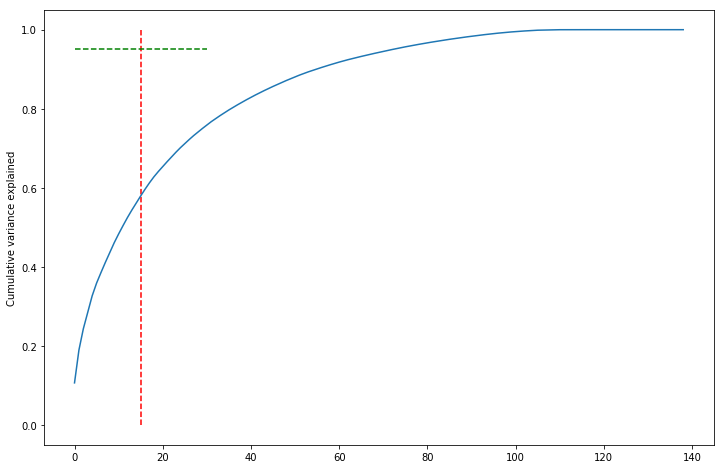

In [54]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [55]:
#Perform PCA with 18 components

In [56]:
from sklearn.decomposition import IncrementalPCA

In [57]:
pca_final = IncrementalPCA(n_components=18)

In [58]:
df_train_pca = pca_final.fit_transform(X_train)

In [59]:
df_train_pca.shape

(19952, 18)

In [60]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [61]:
corrmat.shape

(18, 18)

In [62]:
#plotting the heatmap of the corr matrix

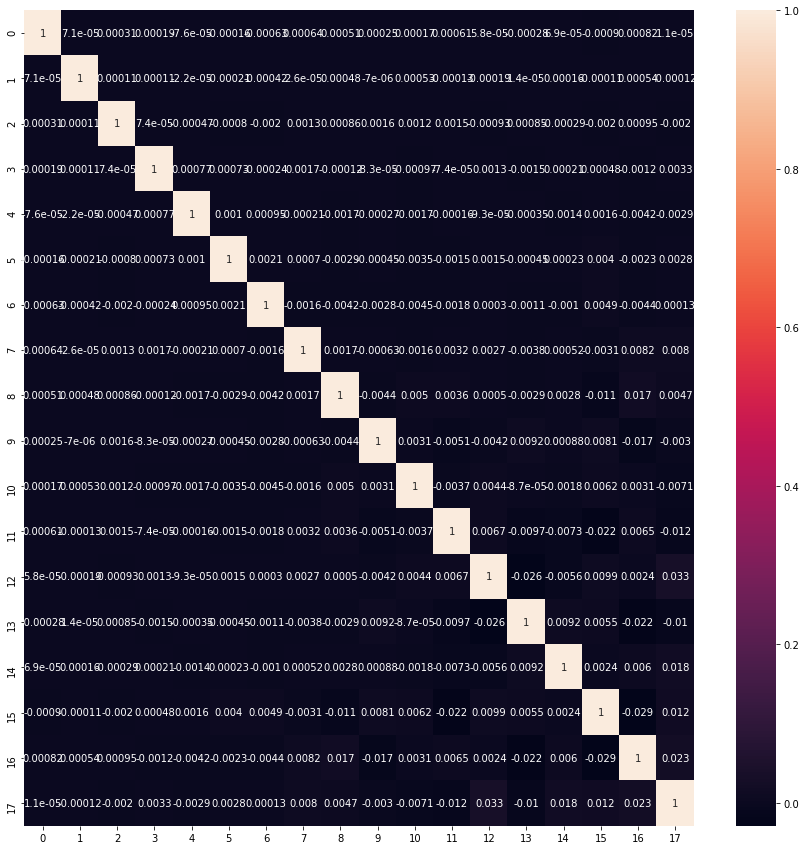

In [63]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [64]:
#Applying the transformation on the test data

In [65]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8552, 18)

In [67]:
#Applying logistic regression on the data on our PCA components

In [57]:
from sklearn import metrics

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
learner_pca = LogisticRegression()

In [70]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [71]:
#Making predictions on the test set

In [72]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [75]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.82'

In [76]:
#82% accuracy with default PCA


In [77]:
y_pred_df = pd.DataFrame(pred_probs_test)


In [95]:
y_pred_df.head()

,0,1
0,0.987990,0.012010
1,0.958907,0.041093
2,0.858287,0.141713
3,0.952497,0.047503
4,0.987198,0.012802


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [82]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.163989,0.024046,0.155574,arpu_6
1,0.169333,0.017668,0.182822,arpu_7
2,0.161484,0.036709,0.195175,arpu_8
3,0.127478,-0.090892,0.002410,onnet_mou_6
4,0.136911,-0.103553,0.016897,onnet_mou_7
5,0.134075,-0.087242,0.027732,onnet_mou_8
6,0.165157,-0.035968,0.024172,offnet_mou_6
7,0.171299,-0.047012,0.041610,offnet_mou_7
8,0.163135,-0.028557,0.055254,offnet_mou_8
9,0.021393,-0.003968,0.029944,roam_ic_mou_6


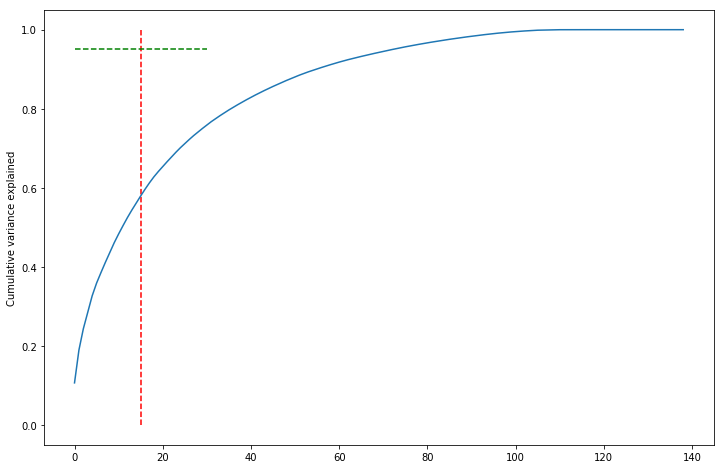

In [83]:
#making the scree plot again
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [86]:
#data is highly imbalance
#the key features are as follows:
#arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6

In [85]:
#The next step is to run the model with Ridge and Lasso

In [87]:
#Loading the data again

In [5]:
churn_filter = pd.read_csv('churn_filter_clean.csv', low_memory=False)


In [89]:
churn_filter.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,tot_data_rech_8,tot_amt_data_8,churn
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,0,0,0,0.0,3638.0,1
1,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,0,1,0,1,207.0,327.0,0
2,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0,0,0,0,0.0,718.0,0
3,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,0,0,0,0,1,0,1,540.0,979.0,0
4,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,1,0,1,0,1,455.0,910.0,0


In [6]:
churn_filter = churn_filter.drop(['mobile_number'],axis=1)


In [9]:
churn_filter.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,tot_data_rech_8,tot_amt_data_8,churn
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3638.0,1
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,0,1,0,1,0,0,0,0,1,0,1,207.0,327.0,0
2,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,718.0,0
3,74

In [10]:
X = churn_filter.drop(['churn'],axis=1)
y = churn_filter['churn']

In [11]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'night8_0.0', 'night8_1.0', 'fb6_0.0', 'fb6_1.0', 'fb7_0.0', 'fb7_1.0',
       'fb8_0.0', 'fb8_1.0', 'tot_data_rech_8', 'tot_amt_data_8'],
      dtype='object', length=139)

In [15]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [16]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,tot_data_rech_8,tot_amt_data_8
0,1.133316,1.623150,5.282967,-0.452154,-0.458401,-0.414725,0.153460,0.352781,-0.050070,-0.000497,0.267484,0.245830,-0.026571,-0.081379,0.161560,-0.153966,-0.235514,-0.179373,0.561205,1.138572,0.013153,2.464631,2.168500,2.361406,-0.252646,-0.208231,-0.241266,0.421861,0.707131,0.022970,-0.405746,-0.367399,-0.354729,-0.321582,-0.367341,-0.277007,0.399672,1.374073,1.342056,-0.478209,-0.463104,-0.394042,-0.044031,-0.040668,0.176245,-0.078113,-0.329393,-0.016190,-0.159812,-0.016355,-0.017828,-0.193628,-0.053754,-0.321997,-0.054684,-0.217008,-0.236697,0.289536,0.290662,-0.148111,2.939236,1.688816,0.551471,0.608372,0.351187,-0.148277,0.277541,-0.047905,0.218313,0.620956,0.881176,1.060316,2.554017,1.570511,0.957709,0.957436,0.809596,1.040726,0.904616,0.664234,0.370851,0.770302,-0.108913,-0.244531,-0.112292,0.030381,0.281648,1.023883,0.833921,1.059296,-0.745947,-0.735207,-0.357276,1.664963,0.202386,4.964558,8.214091,3.518596,8.302628,-0.710434,-0.729015,4.770942,-0.382525,-0.379608,-0.343521,-0.389872,-0.408644,-0.391509,-0.4066,-0.413481,-0.385289,-0.425829,-0.447400,-0.425133,-0.342328,-0.337477,-0.336358,-0.210246,-0.211257,-0.185459,-0.448114,-0.270984,-0.359798,-0.333805,-0.156252,-1.085835,-0.117320,-1.120535,-0.114207,-1.061979,-0.108888,-0.210188,-1.025011,-0.219658,-1.048170,-0.24676,-0.969181,-0.285434,1.407520
1,-0.404618,-0.163322,-0.776237,0.323600,0.155587,-0.451814,-0.595161,-0.615254,-0.440133,-0.215439,-0.168037,-0.172173,-0.230766,-0.210483,-0.193705,0.905491,0.523351,-0.298878,-0.345838,-0.402920,-0.458265,-0.290483,-0.297826,-0.308850,-0.252646,-0.208231,0.729949,0.306194,0.061179,-0.499696,-0.126921,-0.107048,-0.328471,-0.410565,-0.416833,-0.212970,-0.152796,-0.142269,-0.148014,-0.363517,-0.357056,-0.360844,-0.044031,-0.044553,-0.043206,-0.332135,-0.329393,0.163816,-0.159812,-0.016355,-0.017828,-0.163232,-0.300806,-0.575912,-0.263354,-0.348752,-0.402977,-0.443055,-0.649226,-0.633294,-0.339481,-0.332132,-0.341332,-0.497141,-0.687594,-0.700072,-0.191709,-0.180557,-0.198523,-0.073750,-0.257531,-0.270283,-0.142789,-0.145

In [17]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [122]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [123]:
#Ridge and Lasso Regression
#Let's now try predicting, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [19]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   13.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [20]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.206658,0.270028,0.003527,0.006106,0.0001,{'alpha': 0.0001},-0.106824,-0.111357,-0.106501,-0.112062,-0.108122,-0.108973,0.002310,3,-0.109145,-0.106363,-0.109895,-0.106314,-0.107923,-0.107928,0.001443
1,0.075291,0.010792,0.003322,0.006158,0.001,{'alpha': 0.001},-0.107036,-0.111502,-0.106720,-0.112235,-0.108357,-0.109170,0.002283,14,-0.109345,-0.106566,-0.110079,-0.106508,-0.108121,-0.108124,0.001439
2,0.077306,0.002804,0.000000,0.000000,0.01,{'alpha': 0.01},-0.107061,-0.111520,-0.106746,-0.112257,-0.108386,-0.109194,0.002280,27,-0.109369,-0.106591,-0.110101,-0.106532,-0.108145,-0.108148,0.001438
3,0.077942,0.009544,0.003323,0.006160,0.05,{'alpha': 0.05},-0.107055,-0.111522,-0.106747,-0.112258,-0.108391,-0.109195,0.002281,28,-0.109370,-0.106594,-0.110103,-0.106535,-0.108147,-0.108150,0.001438
4,0.078255,0.007772,0.004224,0.006737,0.1,{'alpha': 0.1},-0.107047,-0.111522,-0.106746,-0.112257,-0.108393,-0.109193,0.002282,26,-0.109369,-0.106594,-0.110104,-0.106536,-0.108147,-0.108150,0.001437


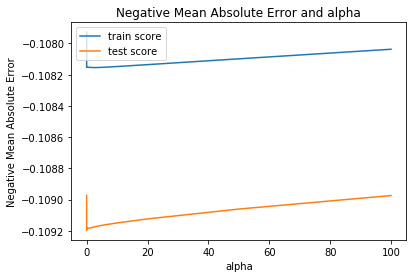

In [21]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [22]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 9.75755393e-04,  2.06773252e-02, -5.29325715e-03, -1.83994366e-02,
        1.69552536e-02, -1.81078534e-02,  9.83831444e-03, -3.69948739e-02,
       -1.50492546e-02,  5.00793710e-03,  1.97493103e-03,  5.74976387e-03,
        2.34215988e-03,  2.03638963e-02,  7.40093554e-03,  1.13983396e-02,
       -1.39664319e-02,  3.01598711e-03, -1.11785071e-02,  1.35131420e-02,
        1.80448859e-03, -2.98072519e-04, -3.34920042e-03,  1.73431986e-03,
       -5.64789053e-03, -1.52909241e-03,  2.86735351e-03, -5.40242169e-04,
       -6.73895762e-04,  2.84226017e-03,  2.34065291e-02, -1.71473646e-02,
       -4.48014791e-03, -7.37521810e-03,  3.64045779e-02, -8.16418290e-03,
       -1.07464863e-03, -9.32342345e-04, -5.42309424e-05,  1.05755020e-02,
        1.35138002e-02, -8.51980449e-03, -2.99689548e-04,  5.22527775e-03,
       -1.52117207e-03,  3.71567976e-03,  5.42865268e-03, -6.75671007e-03,
       -1.19199409e-03,  5.08825453e-03,  3.98387666e-04,  9.15302891e-03,
        1.22789002e-02, -

In [130]:
#Lasso

In [131]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   38.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [132]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.039270,0.867075,0.036728,0.067459,0.0001,{'alpha': 0.0001},-0.106679,-0.111095,-0.106413,-0.111849,...,-0.108831,0.002246,28,-0.109136,-0.106385,-0.109907,-0.106336,-0.107923,-0.107937,0.001435
1,0.559290,0.063184,0.004366,0.005898,0.001,{'alpha': 0.001},-0.104886,-0.109452,-0.104655,-0.110065,...,-0.107076,0.002272,27,-0.107693,-0.104897,-0.108521,-0.104886,-0.106445,-0.106489,0.001462
2,0.146569,0.006750,0.001545,0.001895,0.01,{'alpha': 0.01},-0.100274,-0.106182,-0.099505,-0.105641,...,-0.102791,0.002719,1,-0.104375,-0.101090,-0.104216,-0.100706,-0.102866,-0.102651,0.001529
3,0.089755,0.007168,0.003337,0.006188,0.05,{'alpha': 0.05},-0.102857,-0.108864,-0.102865,-0.108707,...,-0.105797,0.002651,2,-0.107749,-0.103743,-0.107742,-0.103849,-0.105853,-0.105787,0.001767
4,0.091268,0.007143,0.002768,0.002187,0.1,{'alpha': 0.1},-0.102857,-0.108864,-0.102865,-0.108707,...,-0.105797,0.002651,2,-0.107749,-0.103743,-0.107742,-0.103849,-0.105853,-0.105787,0.001767


In [145]:
print("Best AUC: ", model_cv.best_score_)


Best AUC:  -0.10279082575409126


In [146]:
print("Best hyperparameters: ", model_cv.best_params_)


Best hyperparameters:  {'alpha': 0.01}


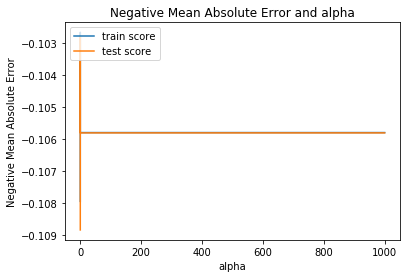

In [133]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [149]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.08104746969756704
0.08502717955175132


In [150]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.056),
 ('arpu_6', 0.0),
 ('arpu_7', 0.0),
 ('arpu_8', -0.0),
 ('onnet_mou_6', 0.0),
 ('onnet_mou_7', 0.0),
 ('onnet_mou_8', -0.0),
 ('offnet_mou_6', 0.0),
 ('offnet_mou_7', 0.0),
 ('offnet_mou_8', -0.0),
 ('roam_ic_mou_6', 0.0),
 ('roam_ic_mou_7', 0.0),
 ('roam_ic_mou_8', 0.005),
 ('roam_og_mou_6', 0.0),
 ('roam_og_mou_7', 0.013),
 ('roam_og_mou_8', 0.0),
 ('loc_og_t2t_mou_6', 0.0),
 ('loc_og_t2t_mou_7', 0.0),
 ('loc_og_t2t_mou_8', 0.0),
 ('loc_og_t2m_mou_6', -0.0),
 ('loc_og_t2m_mou_7', -0.0),
 ('loc_og_t2m_mou_8', -0.0),
 ('loc_og_t2f_mou_6', -0.0),
 ('loc_og_t2f_mou_7', -0.0),
 ('loc_og_t2f_mou_8', -0.0),
 ('loc_og_t2c_mou_6', -0.0),
 ('loc_og_t2c_mou_7', 0.0),
 ('loc_og_t2c_mou_8', -0.0),
 ('loc_og_mou_6', 0.0),
 ('loc_og_mou_7', 0.0),
 ('loc_og_mou_8', -0.0),
 ('std_og_t2t_mou_6', 0.0),
 ('std_og_t2t_mou_7', 0.0),
 ('std_og_t2t_mou_8', -0.0),
 ('std_og_t2m_mou_6', 0.0),
 ('std_og_t2m_mou_7', 0.0),
 ('std_og_t2m_mou_8', -0.0),
 ('std_og_t2f_mou_6', -0.0),
 ('std_og_

In [151]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.12016880280066045
0.12276623195692116


In [138]:
from sklearn.svm import LinearSVC


In [140]:
from sklearn.feature_selection import SelectFromModel


In [141]:
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_train)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(19952, 11)
[ 11  13  39  53  80  92  95 101 120 129 136]


In [142]:
lasso_feat = list(churn_filter.columns[pos])


In [143]:
print(lasso_feat)

['roam_ic_mou_8', 'roam_og_mou_7', 'std_og_mou_6', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'night8_0.0', 'fb8_1.0']


In [144]:
#Features identified by lasso model are ['roam_ic_mou_8', 'roam_og_mou_7', 'std_og_mou_6', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'night8_0.0', 'fb8_1.0']

In [153]:
#performing random forest

In [154]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,tot_data_rech_8,tot_amt_data_8
0,1.133316,1.623150,5.282967,-0.452154,-0.458401,-0.414725,0.153460,0.352781,-0.050070,-0.000497,...,-1.061979,-0.108888,-0.210188,-1.025011,-0.219658,-1.048170,-0.24676,-0.969181,-0.285434,1.407520
1,-0.404618,-0.163322,-0.776237,0.323600,0.155587,-0.451814,-0.595161,-0.615254,-0.440133,-0.215439,...,0.941638,-0.108888,-0.210188,-1.025011,-0.219658,0.954044,-0.24676,1.031799,-0.159590,-0.410272
2,-0.102287,0.056501,0.223070,-0.354992,-0.297979,-0.343929,0.788840,1.008418,1.303772,-0.215439,...,-1.061979,-0.108888,-0.210188,-1.025011,-0.219658,-1.048170,-0.24676,-0.969181,-0.285434,-0.195607
3,-1.082576,-0.784748,-0.317712,-0.471513,-0.466730,-0.455047,-0.614463,-0.597884,-0.297208,-0.215439,...,0.941638,-0.108888,-0.210188,-1.025011,-0.219658,0.954044,-0.24676,1.031799,0.042856,-0.052313
4,0.928038,3.733236,-0.233310,-0.578246,-0.571689,-0.527415,-0.792682,-0.775681,-0.721164,-0.215439,...,0.941638,-0.108888,-0.210188,0.975599,-0.219658,0.954044,-0.24676,1.031799,-0.008819,-0.090196


In [155]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [157]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [158]:
#Default Hyperparameters¶
#Let's first fit a random forest model with default hyperparameters.

In [24]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [160]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [161]:
# Making predictions
predictions = rfc.predict(X_test)

In [162]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [163]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8079
           1       0.62      0.20      0.30       473

   micro avg       0.95      0.95      0.95      8552
   macro avg       0.79      0.59      0.64      8552
weighted avg       0.94      0.95      0.94      8552



In [164]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8022   57]
 [ 380   93]]


In [165]:
print(accuracy_score(y_test,predictions))

0.9489008419083256


In [166]:
#So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

In [167]:
#Hyperparameter tuning

In [168]:
#Tuning Max Depth

In [169]:
#Tuning max_depth
#Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [25]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [26]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.332843,0.040382,0.012514,0.011704,2,{'max_depth': 2},0.943874,0.943874,0.943874,0.944110,0.944096,0.943966,0.000113,4,0.943988,0.943988,0.943988,0.943929,0.943933,0.943966,0.000028
1,0.888427,0.036604,0.009863,0.008059,7,{'max_depth': 7},0.948634,0.947382,0.948885,0.948872,0.948107,0.948376,0.000572,1,0.957647,0.957772,0.957396,0.957086,0.956524,0.957285,0.000447
2,1.353877,0.034690,0.015855,0.000416,12,{'max_depth': 12},0.946880,0.947883,0.952393,0.947368,0.945350,0.947975,0.002366,2,0.979325,0.978009,0.978949,0.978386,0.978951,0.978724,0.000467
3,1.633529,0.031222,0.021877,0.007648,17,{'max_depth': 17},0.942621,0.947632,0.948634,0.945865,0.946854,0.946321,0.002062,3,0.990915,0.990790,0.992294,0.992232,0.991731,0.991592,0.000636


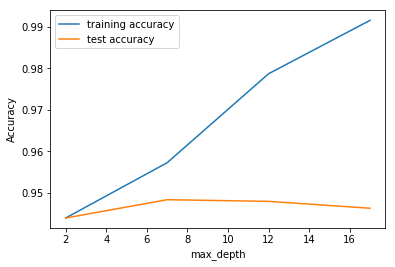

In [27]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [173]:
#Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

In [174]:
### Tuning n_estimators

In [28]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [29]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.047338,0.049402,0.066810,0.003317,100,{'n_estimators': 100},0.945628,0.948133,0.948133,0.948120,0.948609,0.947725,0.001065,2,0.950254,0.950316,0.949627,0.950382,0.950448,0.950205,0.000296
1,24.605564,0.095139,0.284031,0.006418,500,{'n_estimators': 500},0.945377,0.947632,0.948634,0.948371,0.948859,0.947775,0.001268,1,0.950442,0.949940,0.949001,0.950382,0.949508,0.949855,0.000544
2,44.072111,0.049077,0.501711,0.007727,900,{'n_estimators': 900},0.945127,0.947632,0.948133,0.947368,0.948859,0.947424,0.001256,4,0.950567,0.950066,0.949565,0.949944,0.949759,0.949980,0.000339
3,63.884324,0.294911,0.738838,0.030771,1300,{'n_estimators': 1300},0.945878,0.947382,0.948634,0.947870,0.948859,0.947725,0.001064,2,0.950504,0.950191,0.949001,0.950320,0.949884,0.949980,0.000530


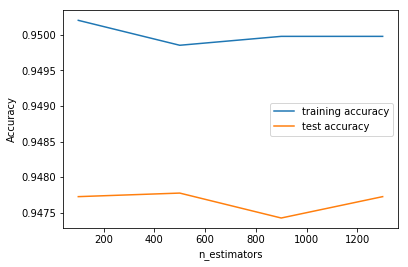

In [30]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [178]:
#Tuning max_features
#Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

In [31]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.232890,0.026483,0.016114,0.000608,4,{'max_features': 4},0.943623,0.944375,0.943874,0.944361,0.945099,0.944266,0.000506,13,0.944051,0.944176,0.944051,0.946059,0.945186,0.944705,0.000800
1,0.419909,0.008323,0.012698,0.005850,8,{'max_features': 8},0.944625,0.945878,0.949136,0.947368,0.950113,0.947424,0.002019,12,0.948562,0.947246,0.947309,0.949254,0.949195,0.948313,0.000880
2,0.660005,0.013190,0.012938,0.006488,14,{'max_features': 14},0.949136,0.946379,0.949386,0.946115,0.950113,0.948226,0.001649,5,0.951569,0.949878,0.949878,0.949442,0.950573,0.950268,0.000745
3,0.890568,0.014242,0.017670,0.003526,20,{'max_features': 20},0.946880,0.947382,0.948634,0.947870,0.947105,0.947574,0.000625,11,0.950442,0.950818,0.949753,0.951009,0.950949,0.950594,0.000465
4,1.068257,0.007603,0.006253,0.007658,24,{'max_features': 24},0.947632,0.946880,0.950138,0.947368,0.948358,0.948075,0.001137,8,0.950880,0.950191,0.949502,0.950883,0.949383,0.950168,0.000645


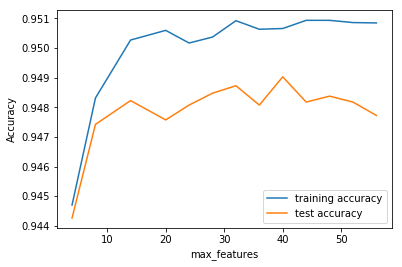

In [33]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [183]:
### Tuning min_samples_leaf

In [34]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [35]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.044384,0.023699,0.015765,0.000496,100,{'min_samples_leaf': 100},0.944375,0.945127,0.946379,0.946867,0.946603,0.945870,0.000957,1,0.947873,0.948312,0.946244,0.948127,0.947504,0.947612,0.000736
1,0.946511,0.028538,0.016480,0.000765,150,{'min_samples_leaf': 150},0.944375,0.945127,0.947382,0.944361,0.946102,0.945469,0.001149,2,0.947121,0.945993,0.944803,0.945370,0.947378,0.946133,0.000990
2,0.880954,0.029957,0.016253,0.000510,200,{'min_samples_leaf': 200},0.943874,0.943874,0.943874,0.944110,0.944096,0.943966,0.000113,3,0.943988,0.943988,0.943988,0.943929,0.943933,0.943966,0.000028
3,0.822412,0.023870,0.015845,0.000444,250,{'min_samples_leaf': 250},0.943874,0.943874,0.943874,0.944110,0.944096,0.943966,0.000113,3,0.943988,0.943988,0.943988,0.943929,0.943933,0.943966,0.000028
4,0.793645,0.065311,0.015593,0.001733,300,{'min_samples_leaf': 300},0.943874,0.943874,0.943874,0.944110,0.944096,0.943966,0.000113,3,0.943988,0.943988,0.943988,0.943929,0.943933,0.943966,0.000028


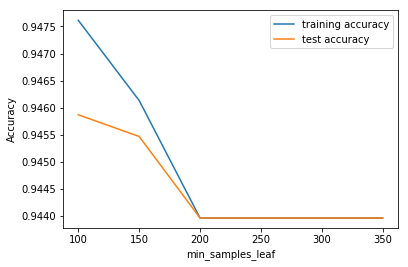

In [36]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [187]:
### Tuning min_samples_split


In [37]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [38]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.616556,0.049470,0.015845,0.000424,200,{'min_samples_split': 200},0.947382,0.945878,0.947632,0.947870,0.949361,0.947624,0.001112,1,0.951006,0.949690,0.947873,0.948816,0.949258,0.949328,0.001032
1,1.604407,0.045492,0.013680,0.004108,250,{'min_samples_split': 250},0.946379,0.945377,0.945878,0.946617,0.949862,0.946822,0.001578,2,0.949753,0.947622,0.947372,0.948440,0.948631,0.948364,0.000841
2,1.568877,0.050045,0.015645,0.000037,300,{'min_samples_split': 300},0.945628,0.946379,0.944625,0.946115,0.948609,0.946271,0.001313,4,0.949314,0.946996,0.945304,0.947563,0.948631,0.947562,0.001388
3,1.496404,0.067951,0.015865,0.000460,350,{'min_samples_split': 350},0.944124,0.948133,0.943874,0.945865,0.950113,0.946421,0.002393,3,0.946620,0.949126,0.944051,0.946623,0.947065,0.946697,0.001615
4,1.525085,0.019180,0.016020,0.000825,400,{'min_samples_split': 400},0.943874,0.943874,0.943874,0.944612,0.946352,0.944517,0.000961,5,0.944176,0.944176,0.943988,0.946373,0.944935,0.944730,0.000884


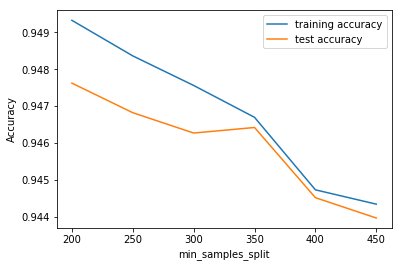

In [39]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [192]:
#Grid Search to Find Optimal Hyperparameters¶
#We can now find the optimal hyperparameters using GridSearchCV.

In [41]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [42]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 12.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [43]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9459703287890938 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [44]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [45]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
# predict
predictions = rfc.predict(X_test)

In [47]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8074
           1       0.69      0.18      0.28       478

   micro avg       0.95      0.95      0.95      8552
   macro avg       0.82      0.59      0.63      8552
weighted avg       0.94      0.95      0.94      8552



In [49]:
print(confusion_matrix(y_test,predictions))

[[8036   38]
 [ 393   85]]


In [50]:
#OBSERVATIONS

#Got 94.0% accuracy
#Confusion matix is improved , false positives still exist but has been reduced.

In [51]:
import pandas as pd
feature_import = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [52]:
feature_import.head(25)


,importance
loc_ic_mou_8,0.118913
roam_og_mou_8,0.069438
loc_ic_t2m_mou_8,0.066996
total_ic_mou_8,0.061002
roam_ic_mou_8,0.058922
loc_ic_t2t_mou_8,0.042383
total_og_mou_8,0.038474
tot_amt_data_8,0.034831
std_ic_mou_8,0.031127
arpu_8,0.029979


In [55]:
feature_import_Tuning= pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_import_Tuning.head(10)

,importance
loc_ic_mou_8,0.118913
roam_og_mou_8,0.069438
loc_ic_t2m_mou_8,0.066996
total_ic_mou_8,0.061002
roam_ic_mou_8,0.058922
loc_ic_t2t_mou_8,0.042383
total_og_mou_8,0.038474
tot_amt_data_8,0.034831
std_ic_mou_8,0.031127
arpu_8,0.029979


In [58]:
#Making prediction on the test data
pred_probs= rfc.predict_proba(X_test)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs))

'0.91'

In [59]:
y_predicted_df = pd.DataFrame(pred_probs)
y_predicted_df.head()

,0
0,0.019972
1,0.035331
2,0.107549
3,0.009047
4,0.029250


In [61]:
# Converting the test data to a dataframe
y_test= pd.DataFrame(y_test)
y_test.head()

,churn
6762,0
8491,0
3314,0
10618,0
5051,0


In [62]:
# Removing the index for both dataframes and appending them side by side 
y_predicted_df.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [63]:
y_final = pd.concat([y_test,y_predicted_df],axis=1)

In [65]:
y_final.head(20)

,churn,0
0,0,0.019972
1,0,0.035331
2,0,0.107549
3,0,0.009047
4,0,0.029250
5,0,0.014176
6,0,0.029924
7,0,0.035503
8,0,0.015055
9,0,0.022865


In [67]:
# Renaming the column 
y_final= y_final.rename(columns={ 0 : 'Churn_Prob'})


In [68]:
y_final.head()

,churn,Churn_Prob
0,0,0.019972
1,0,0.035331
2,0,0.107549
3,0,0.009047
4,0,0.029250


In [69]:
# new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_final['predicted'] = y_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [71]:
y_final.head(20)

,churn,Churn_Prob,predicted
0,0,0.019972,0
1,0,0.035331,0
2,0,0.107549,0
3,0,0.009047,0
4,0,0.029250,0
5,0,0.014176,0
6,0,0.029924,0
7,0,0.035503,0
8,0,0.015055,0
9,0,0.022865,0


In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_final.churn, y_final.predicted )
confusion

array([[8036,   38],
       [ 393,   85]], dtype=int64)

In [74]:
#overall accuracy.
metrics.accuracy_score( y_final.churn, y_final.predicted)

0.9496024321796072

In [75]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_final[i]= y_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_final.head()

,churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.019972,0,1,0,0,0,0,0,0,0,0,0
1,0,0.035331,0,1,0,0,0,0,0,0,0,0,0
2,0,0.107549,0,1,1,0,0,0,0,0,0,0,0
3,0,0.009047,0,1,0,0,0,0,0,0,0,0,0
4,0,0.029250,0,1,0,0,0,0,0,0,0,0,0


In [76]:
# sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_final.churn, y_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.055893  0.000000  1.000000
0.1   0.1  0.890786  0.898316  0.763598
0.2   0.2  0.943873  0.968541  0.527197
0.3   0.3  0.951707  0.986004  0.372385
0.4   0.4  0.952760  0.990339  0.317992
0.5   0.5  0.949602  0.995294  0.177824
0.6   0.6  0.944107  1.000000  0.000000
0.7   0.7  0.944107  1.000000  0.000000
0.8   0.8  0.944107  1.000000  0.000000
0.9   0.9  0.944107  1.000000  0.000000


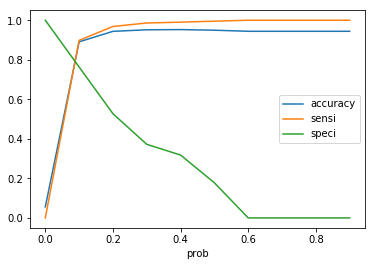

In [77]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [78]:
y_final['final_predicted'] = y_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)


In [79]:
#the overall accuracy.
metrics.accuracy_score( y_final.churn, y_final.final_predicted)

0.8907857811038353

In [80]:
metrics.confusion_matrix( y_final.churn, y_final.final_predicted )


array([[7253,  821],
       [ 113,  365]], dtype=int64)

In [81]:
feature_importances= pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [83]:
feature_importances.head(10)

,importance
loc_ic_mou_8,0.118913
roam_og_mou_8,0.069438
loc_ic_t2m_mou_8,0.066996
total_ic_mou_8,0.061002
roam_ic_mou_8,0.058922
loc_ic_t2t_mou_8,0.042383
total_og_mou_8,0.038474
tot_amt_data_8,0.034831
std_ic_mou_8,0.031127
arpu_8,0.029979


In [84]:
#Some of the important features are ["loc_ic_mou_8","roam_og_mou_8","arpu_8","loc_ic_t2m_mou_8","loc_ic_t2t_mou_8"]

In [85]:
#The model gives best result when used Lasso with Random forest

In [86]:
#Reccomendations
#provide more discount to persons using the network for long time
#monitor the churn phase 
#Monitor the average recharges in the 8th month